In [2]:
import pylab as pl
import numpy as np

## Read Data & Data Scatter Plot

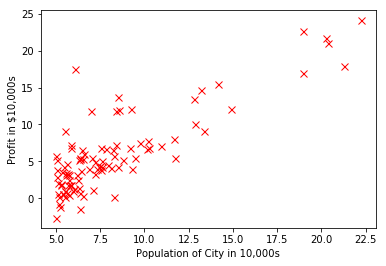

In [3]:
def read_data():
    return np.loadtxt(open("ex1data1.txt", "rb"), delimiter=",")

data = read_data()
data_X = data[:,0] #gets 0th col
data_y = data[:,1] #gets 1st col
pl.plot(data_X, data_y, 'rx', markersize=7)
pl.ylabel('Profit in $10,000s');
pl.xlabel('Population of City in 10,000s');
pl.show()


## Cost Function J(theta0, theta1)

In [3]:
def compute_cost(X, y, theta): 
    # formula is J(theta0, theta1) = (1/2m) * sum(htheta(xi) - yi)^2
    return (np.sum(np.power( theta * X.T - y, 2))) / (2 * len(X))


### 1. Read the data

In [18]:
data = read_data()

#read y
y = np.matrix(data_y) #get 1st col, make a matrix

#add col of 1s to X matrix
ones = np.ones(np.size(data_X))
X = np.column_stack((ones, data_X))



### 2. Initialize theta

In [5]:
#initialize theta to 0,0 
theta = np.matrix(np.array([0,0]))

### 3. Try to compute cost for theta 0,0

In [6]:
print compute_cost(X, y, theta)

32.0727338775


## Gradient Descent
Once we've defined the cost function, time to implement gradient descent for linear regression!

### Write the Gradient Descent Func

In [22]:
def gradient_descent(X, y, theta, alpha, num_iters):
    temp_theta = np.matrix(np.zeros(theta.shape)) #stores each temp theta calculate
    cost = np.zeros(num_iters) #store all the costs on the way
    
    for iter in range(num_iters):
        sq_error = (theta * X.T) - y

        for param in range(theta.shape[1]):
            term = np.multiply(sq_error,X[:,param])
            temp_theta[0, param] = theta[0,param] - ((alpha/len(X))*(np.sum(term)))
            
        #once computation is done for all thetas, update the theta matrix    
        theta = temp_theta
        cost[iter] = compute_cost(X,y,theta)
        
    return theta, cost

### Set Num of Iterations and Learning Rate

In [59]:
iterations = 3000;
alpha = 0.01;

### Run Gradient Descent

In [79]:
best_theta, all_costs = gradient_descent(X,y, theta, alpha, iterations)
print "Best theta found at =>", best_theta, "\nLowest cost =>", compute_cost(X,y,best_theta)

Best theta found at => [[ -2.45468954e+69  -2.44342907e+70]] 
Lowest cost => 2.47929098472e+142


### Plot the best fitting theta

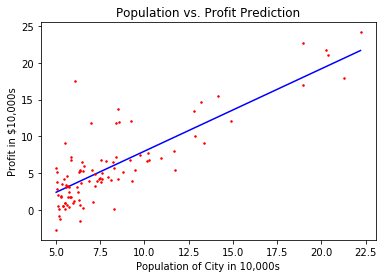

In [69]:
def get_line(x):
    return 1.12*(x) -3.2 

def plot_lin_regression():
    x = np.linspace(np.min(data_X), np.max(data_X))
    pl.plot(x, get_line(x), 'b')
    pl.plot(data_X, data_y, 'r.', markersize=3)
    pl.ylabel('Profit in $10,000s');
    pl.xlabel('Population of City in 10,000s');
    pl.title('Population vs. Profit Prediction')
    pl.show()
    
plot_lin_regression()

### Plot the iterations vs. cost graph to show that cost keeps going down every iteration

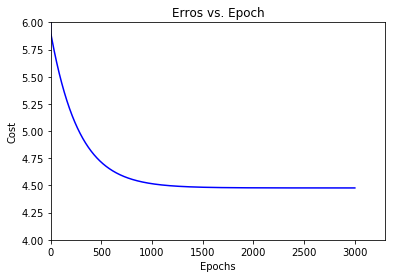

In [68]:
def plot_epoch():
    pl.plot(np.arange(iterations), all_costs, 'b')
    pl.xlabel('Epochs');
    pl.ylabel('Cost');
    pl.title('Erros vs. Epoch')
    pl.xlim(0, 3300)
    pl.ylim(4, 6)
    pl.show()

plot_epoch()

### Last Step: Try with a bigger alpha (converge faster)

In [103]:
iterations = 3000;
alpha = 0.024; #biggest possible from trial and error
best_theta, all_costs = gradient_descent(X,y, theta, alpha, iterations)
print "Best theta found at =>", best_theta, "\nLowest cost =>", compute_cost(X,y,best_theta)

Best theta found at => [[-3.89577195  1.19303275]] 
Lowest cost => 4.47697137598


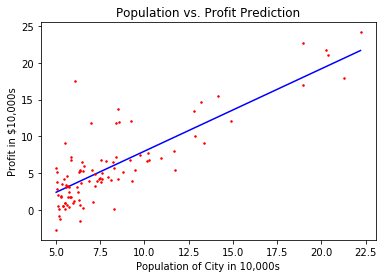

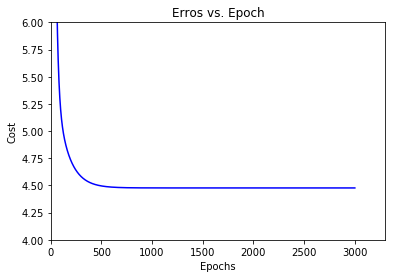

In [102]:
plot_lin_regression()
plot_epoch()